# Project 6 CAPSTONE - NLP w/ Logistic Regression and Random Forest
---

In [5]:
# Imports
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import wordnet as wn
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Data Cleaning
---

In [7]:
# Read in finedining data
finedining_all = pd.read_csv('../data/PRAW/finedining.csv')

In [8]:
finedining_all.shape

(996, 4)

In [9]:
finedining_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_utc  996 non-null    float64
 1   title        996 non-null    object 
 2   self_text    879 non-null    object 
 3   subreddit    996 non-null    object 
dtypes: float64(1), object(3)
memory usage: 31.3+ KB


In [12]:
# Read in budgetfood data
budgetfood_all = pd.read_csv('../data/PRAW/budgetfood.csv')

In [13]:
budgetfood_all.shape

(888, 4)

In [16]:
# Combine each subreddit csv from PRAW into a combined csv to process
df = pd.concat([budgetfood, finedining], ignore_index=True)

In [17]:
# Dataframe combined confirmation
df.shape

(1884, 4)

# Project Capstone Part 3: Preprocessing + EDA
---

In [20]:
# Confirm column names
print(df.columns.tolist())

['created_utc', 'title', 'self_text', 'subreddit']


In [21]:
# Merge 'title' and 'self_text' into a single 'text' column
df['title'] = df['title'].fillna('')
df['self_text'] = df['self_text'].fillna('')
df['text'] = df['title'] + ' ' + df['self_text']

In [22]:
# Confirm new column was added
df.head()

,created_utc,title,self_text,subreddit,text
0,1.735956e+09,Beginner budgeter here. Need assistance.,I think we can all agree that the prices at th...,budgetfood,Beginner budgeter here. Need assistance. I th...
1,1.735900e+09,cold lunches ideas,"Hello, so my boyfriend is a geodesist, so they...",budgetfood,"cold lunches ideas Hello, so my boyfriend is a..."
2,1.735877e+09,Ideas for fast and cheap cake/cookies/treats? ...,"Hi, I need to prepare about \~50 treats for a ...",budgetfood,Ideas for fast and cheap cake/cookies/treats? ...
3,1.735870e+09,Easy soup recipe!!,I was in a pinch and was craving soup!\nI boil...,budgetfood,Easy soup recipe!! I was in a pinch and was cr...
4,1.735700e+09,Easy budget soup,I made this video for a cooking page I’m part ...,budgetfood,Easy budget soup I made this video for a cooki...


In [23]:
df.shape

(1884, 5)

In [24]:
print(df.columns.tolist())

['created_utc', 'title', 'self_text', 'subreddit', 'text']


In [25]:
# Remove stop words

In [26]:
# download stop words
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gfranksjr24/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
stop_words = set(stopwords.words('english'))

In [28]:
def remove_stopwords(text):
    if pd.isna(text):
        return ""
    words = str(text).split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

In [29]:
df['clean_text'] = df['text'].apply(remove_stopwords)

In [30]:
df.shape

(1884, 6)

In [31]:
df.head()

,created_utc,title,self_text,subreddit,text,clean_text
0,1.735956e+09,Beginner budgeter here. Need assistance.,I think we can all agree that the prices at th...,budgetfood,Beginner budgeter here. Need assistance. I th...,Beginner budgeter here. Need assistance. think...
1,1.735900e+09,cold lunches ideas,"Hello, so my boyfriend is a geodesist, so they...",budgetfood,"cold lunches ideas Hello, so my boyfriend is a...","cold lunches ideas Hello, boyfriend geodesist,..."
2,1.735877e+09,Ideas for fast and cheap cake/cookies/treats? ...,"Hi, I need to prepare about \~50 treats for a ...",budgetfood,Ideas for fast and cheap cake/cookies/treats? ...,Ideas fast cheap cake/cookies/treats? Need mak...
3,1.735870e+09,Easy soup recipe!!,I was in a pinch and was craving soup!\nI boil...,budgetfood,Easy soup recipe!! I was in a pinch and was cr...,Easy soup recipe!! pinch craving soup! boiled ...
4,1.735700e+09,Easy budget soup,I made this video for a cooking page I’m part ...,budgetfood,Easy budget soup I made this video for a cooki...,Easy budget soup made video cooking page I’m p...


In [32]:
# Remove special characters
df['clean_text'] = df['clean_text'].str.replace(r'[^\w\s]', '', regex=True)

In [33]:
df.head()

,created_utc,title,self_text,subreddit,text,clean_text
0,1.735956e+09,Beginner budgeter here. Need assistance.,I think we can all agree that the prices at th...,budgetfood,Beginner budgeter here. Need assistance. I th...,Beginner budgeter here Need assistance think a...
1,1.735900e+09,cold lunches ideas,"Hello, so my boyfriend is a geodesist, so they...",budgetfood,"cold lunches ideas Hello, so my boyfriend is a...",cold lunches ideas Hello boyfriend geodesist w...
2,1.735877e+09,Ideas for fast and cheap cake/cookies/treats? ...,"Hi, I need to prepare about \~50 treats for a ...",budgetfood,Ideas for fast and cheap cake/cookies/treats? ...,Ideas fast cheap cakecookiestreats Need make 5...
3,1.735870e+09,Easy soup recipe!!,I was in a pinch and was craving soup!\nI boil...,budgetfood,Easy soup recipe!! I was in a pinch and was cr...,Easy soup recipe pinch craving soup boiled car...
4,1.735700e+09,Easy budget soup,I made this video for a cooking page I’m part ...,budgetfood,Easy budget soup I made this video for a cooki...,Easy budget soup made video cooking page Im pa...


In [34]:
print(df.columns.tolist()) 

['created_utc', 'title', 'self_text', 'subreddit', 'text', 'clean_text']


In [35]:
df = df.drop(['title', 'self_text', 'text'], axis=1)

In [36]:
print(df.columns.tolist()) 

['created_utc', 'subreddit', 'clean_text']


In [37]:
df.head()

,created_utc,subreddit,clean_text
0,1.735956e+09,budgetfood,Beginner budgeter here Need assistance think a...
1,1.735900e+09,budgetfood,cold lunches ideas Hello boyfriend geodesist w...
2,1.735877e+09,budgetfood,Ideas fast cheap cakecookiestreats Need make 5...
3,1.735870e+09,budgetfood,Easy soup recipe pinch craving soup boiled car...
4,1.735700e+09,budgetfood,Easy budget soup made video cooking page Im pa...


In [38]:
# Change all characters to lowercase
df['clean_text'] = df['clean_text'].str.lower()

In [39]:
df.head()

,created_utc,subreddit,clean_text
0,1.735956e+09,budgetfood,beginner budgeter here need assistance think a...
1,1.735900e+09,budgetfood,cold lunches ideas hello boyfriend geodesist w...
2,1.735877e+09,budgetfood,ideas fast cheap cakecookiestreats need make 5...
3,1.735870e+09,budgetfood,easy soup recipe pinch craving soup boiled car...
4,1.735700e+09,budgetfood,easy budget soup made video cooking page im pa...


In [40]:
# Download NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def is_food_related(word):
    synsets = wn.synsets(word, pos=wn.NOUN)
    for synset in synsets:
        if 'food' in synset.lexname():
            return True
    return False

def keep_food_words(text):
    if pd.isna(text):
        return ""
    words = word_tokenize(str(text).lower())
    food_words = [word for word in words if is_food_related(word) and word.lower() not in stop_words]
    return ' '.join(food_words)

# Apply the function to create the new 'clean_text' column
df['clean_text'] = df['clean_text'].apply(keep_food_words)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gfranksjr24/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/gfranksjr24/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/gfranksjr24/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [41]:
df.head(20)

,created_utc,subreddit,clean_text
0,1.735956e+09,budgetfood,food lunches dietary food chicken beef veggies...
1,1.735900e+09,budgetfood,lunches donuts bread meal portion
2,1.735877e+09,budgetfood,treats treats cookies cookies treats must swee...
3,1.735870e+09,budgetfood,soup soup carrots potatoes chicken broth milk ...
4,1.735700e+09,budgetfood,soup chicken broth bouillon water sausage brea...
5,1.735692e+09,budgetfood,sub milk cheese meals food meals milk margarin...
6,1.735644e+09,budgetfood,corn cakes
7,1.735623e+09,budgetfood,
8,1.735522e+09,budgetfood,dessert treats fudge pastries marshmallow broiler
9,1.735456e+09,budgetfood,chicken meals chicken chicken salad meals brea...


In [42]:
df.value_counts('subreddit')

subreddit
finedining    996
budgetfood    888
Name: count, dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_utc  1884 non-null   float64
 1   subreddit    1884 non-null   object 
 2   clean_text   1884 non-null   object 
dtypes: float64(1), object(2)
memory usage: 44.3+ KB


#### Count Vectorizing

In [46]:
# Instantiate a CountVectorizer object
cv = CountVectorizer()

# Fit and transform the count vectorizer on the clean_text column
cv_transformed = cv.fit_transform(df['clean_text'])

# Convert to a dense array
cv_dense = cv_transformed.toarray()

# Get the feature names (words)
feature_names = cv.get_feature_names_out()

# Create a DataFrame from the dense array
df_cv = pd.DataFrame(cv_dense, columns=feature_names)

# Add the subreddit column to the new DataFrame
df_cv['subreddit'] = df['subreddit'].values

In [47]:
df_cv.shape

(1884, 1130)

In [48]:
df_cv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Columns: 1130 entries, adobo to subreddit
dtypes: int64(1129), object(1)
memory usage: 16.2+ MB


In [49]:
# Confirm subreddit column is still in dataframe
df_cv['subreddit'].head()

0    budgetfood
1    budgetfood
2    budgetfood
3    budgetfood
4    budgetfood
Name: subreddit, dtype: object

In [50]:
# Sum up the occurrences of each word, excluding the subreddit column
word_freq = df_cv.drop(columns=['subreddit']).sum().sort_values(ascending=False)

# Get the top 25 most common words
top_25_words = word_freq.head(25)

print("25 most common words overall:")
print(top_25_words)

25 most common words overall:
food           858
meal           632
dish           514
menu           486
chicken        426
sauce          419
course         368
rice           346
dinner         335
sushi          327
meals          300
dishes         296
bit            292
cheese         289
wine           276
lunch          256
meat           247
taste          217
ingredients    211
bread          204
butter         202
oil            196
beans          194
sweet          191
dessert        185
dtype: int64


In [51]:
# Filter for the 'budgetfood' subreddit
budgetfood_df_cv = df_cv[df_cv['subreddit'] == 'budgetfood']

# Sum up the occurrences of each word, excluding the subreddit column
budgetfood_word_freq = budgetfood_df_cv.drop(columns=['subreddit']).sum().sort_values(ascending=False)

# Get the top 25 most common words for budgetfood
top_25_budgetfood_words = budgetfood_word_freq.head(25)

print("25 most common words in Budget Food subreddit:")
print(top_25_budgetfood_words)

25 most common words in Budget Food subreddit:
food           410
chicken        363
meals          231
meal           228
cheese         217
rice           211
beans          181
meat           167
sauce          156
potatoes       138
water          133
onion          131
eggs           128
oil            123
ingredients    121
garlic         120
butter         114
pepper         112
salt           109
beef           105
soup           103
milk           102
pasta           98
bread           97
taste           94
dtype: int64


In [52]:
# Filter for the 'finedining' subreddit
finedining_df_cv = df_cv[df_cv['subreddit'] == 'finedining']

# Sum up the occurrences of each word, excluding the subreddit column
finedining_word_freq = finedining_df_cv.drop(columns=['subreddit']).sum().sort_values(ascending=False)

# Get the top 25 most common words for finedining
top_25_finedining_words = finedining_word_freq.head(25)

print("25 most common words in finedining subreddit:")
print(top_25_finedining_words)

25 most common words in finedining subreddit:
dish         477
menu         471
food         448
meal         404
course       361
sushi        325
dishes       273
wine         265
sauce        263
dinner       257
bit          203
courses      181
lunch        176
dessert      174
sweet        157
table        152
rice         135
fish         133
delicious    124
taste        123
caviar       117
cream        116
bread        107
white        106
crab         100
dtype: int64


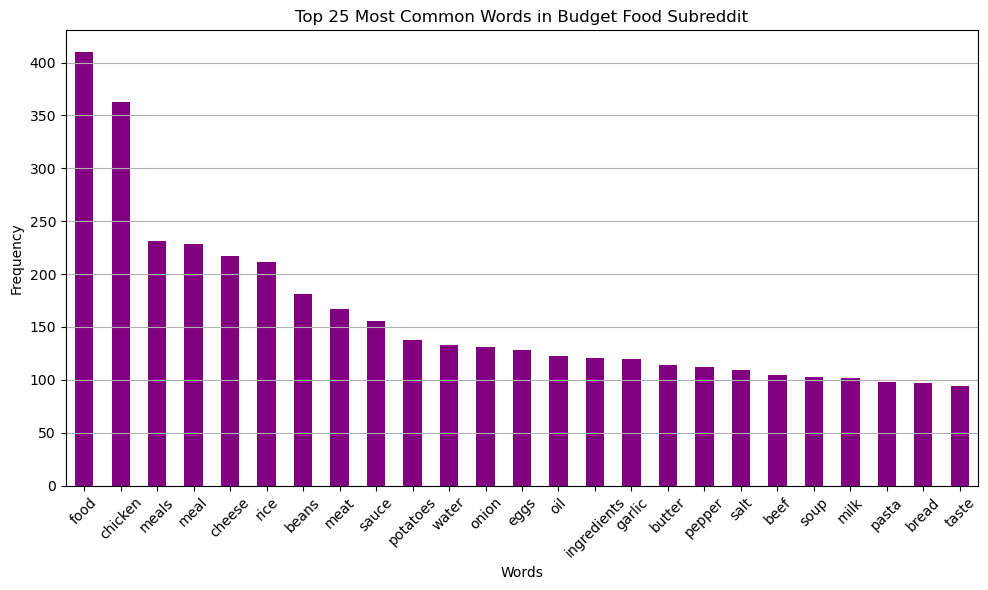

In [152]:
# Take out the top 25 budgetfood dataframe words 
top_25_budgetfood_words = budgetfood_word_freq.head(25)

# Create a bar chart
plt.figure(figsize=(10, 6))
top_25_budgetfood_words.plot(kind='bar', color='purple')

# Set the title and labels
plt.title('Top 25 Most Common Words in Budget Food Subreddit')
plt.xlabel('Words')
plt.ylabel('Frequency')

# Rotate x-axis labels 
plt.xticks(rotation=45)

# Show grid
plt.grid(axis='y')

# Display the chart
plt.tight_layout() 
plt.show()

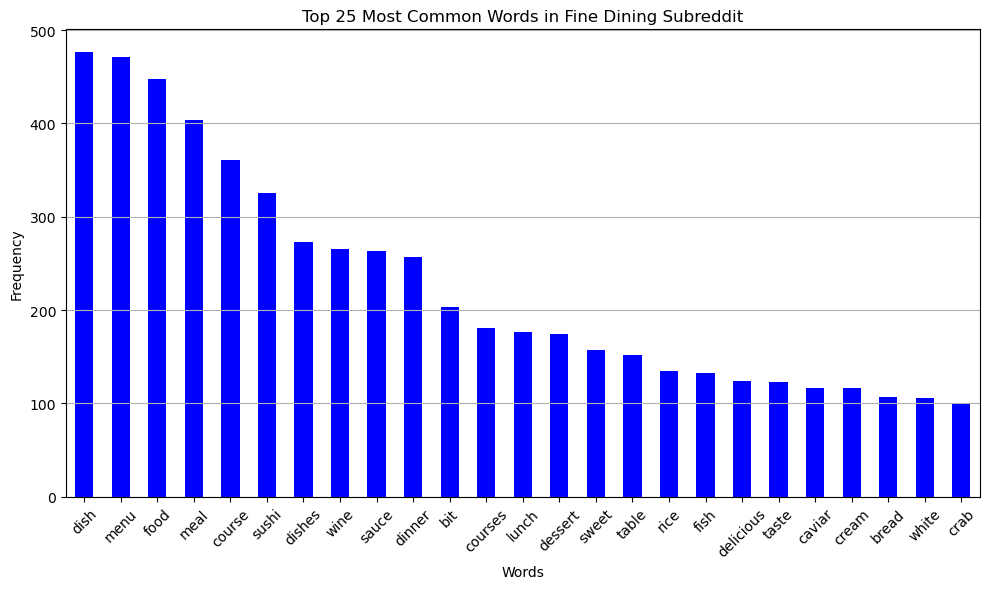

In [150]:
# Take out the top 25 finedining dataframe words 
top_25_finedining_words = finedining_word_freq.head(25)

# Create a bar chart
plt.figure(figsize=(10, 6))
top_25_finedining_words.plot(kind='bar', color='blue')

# Set the title and labels
plt.title('Top 25 Most Common Words in Fine Dining Subreddit')
plt.xlabel('Words')
plt.ylabel('Frequency')

# Rotate x-axis labels 
plt.xticks(rotation=45)

# Show grid
plt.grid(axis='y')

# Display the chart
plt.tight_layout() 
plt.show()

In [55]:
########

### Sentiment Analysis

In [57]:
finedining_word_freq.head()

dish      477
menu      471
food      448
meal      404
course    361
dtype: int64

In [58]:
budgetfood_word_freq.head()

food       410
chicken    363
meals      231
meal       228
cheese     217
dtype: int64

In [59]:
# Initialize the SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

def analyze_sentiment(word):
    # Get sentiment scores for the word
    scores = sid.polarity_scores(word)
    return scores['compound'], scores['pos'], scores['neg'], scores['neu']

In [60]:
# Analyzing sentiment for finedining
finedining_sentiment = finedining_word_freq.index.to_series().apply(analyze_sentiment)
finedining_sentiment_df = pd.DataFrame(finedining_sentiment.tolist(), index=finedining_word_freq.index, columns=['compound', 'positive', 'negative', 'neutral'])

# Analyzing sentiment for budgetfood
budgetfood_sentiment = budgetfood_word_freq.index.to_series().apply(analyze_sentiment)
budgetfood_sentiment_df = pd.DataFrame(budgetfood_sentiment.tolist(), index=budgetfood_word_freq.index, columns=['compound', 'positive', 'negative', 'neutral'])

# Display results
print("Fine Dining Sentiment Scores:")
print(finedining_sentiment_df)

print("\nBudget Food Sentiment Scores:")
print(budgetfood_sentiment_df)

Fine Dining Sentiment Scores:
          compound  positive  negative  neutral
dish           0.0       0.0       0.0      1.0
menu           0.0       0.0       0.0      1.0
food           0.0       0.0       0.0      1.0
meal           0.0       0.0       0.0      1.0
course         0.0       0.0       0.0      1.0
...            ...       ...       ...      ...
bosc           0.0       0.0       0.0      1.0
stocks         0.0       0.0       0.0      1.0
patties        0.0       0.0       0.0      1.0
roux           0.0       0.0       0.0      1.0
luncheon       0.0       0.0       0.0      1.0

[1129 rows x 4 columns]

Budget Food Sentiment Scores:
          compound  positive  negative  neutral
food           0.0       0.0       0.0      1.0
chicken        0.0       0.0       0.0      1.0
meals          0.0       0.0       0.0      1.0
meal           0.0       0.0       0.0      1.0
cheese         0.0       0.0       0.0      1.0
...            ...       ...       ...      ...
mi

In [61]:
# Get top positive and negative words for finedining
top_finedining_positive = finedining_sentiment_df.nlargest(15, 'compound')
top_finedining_negative = finedining_sentiment_df.nsmallest(15, 'compound')

# Get top positive and negative words for budgetfood
top_budgetfood_positive = budgetfood_sentiment_df.nlargest(15, 'compound')
top_budgetfood_negative = budgetfood_sentiment_df.nsmallest(15, 'compound')

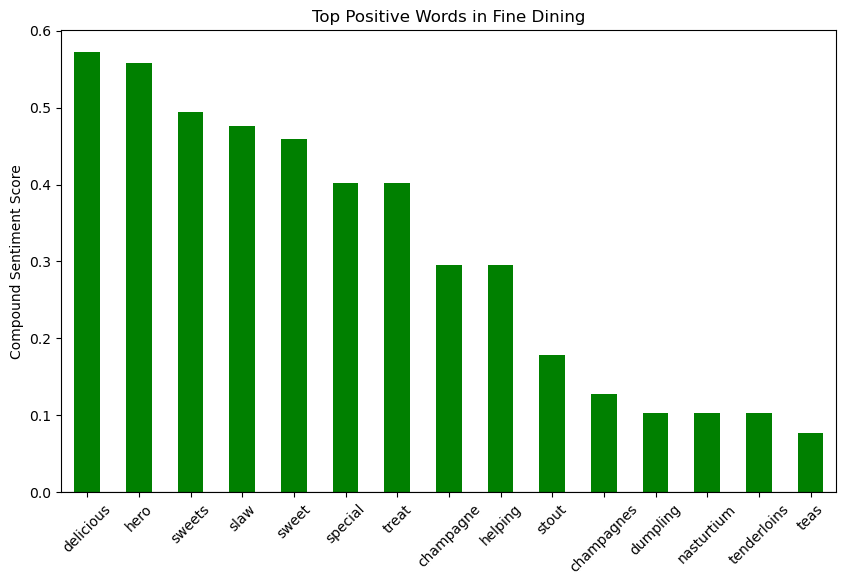

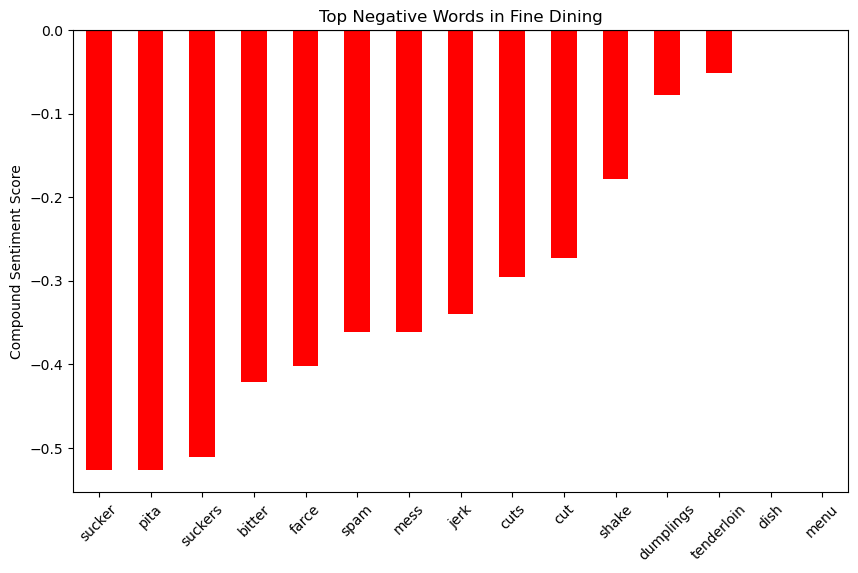

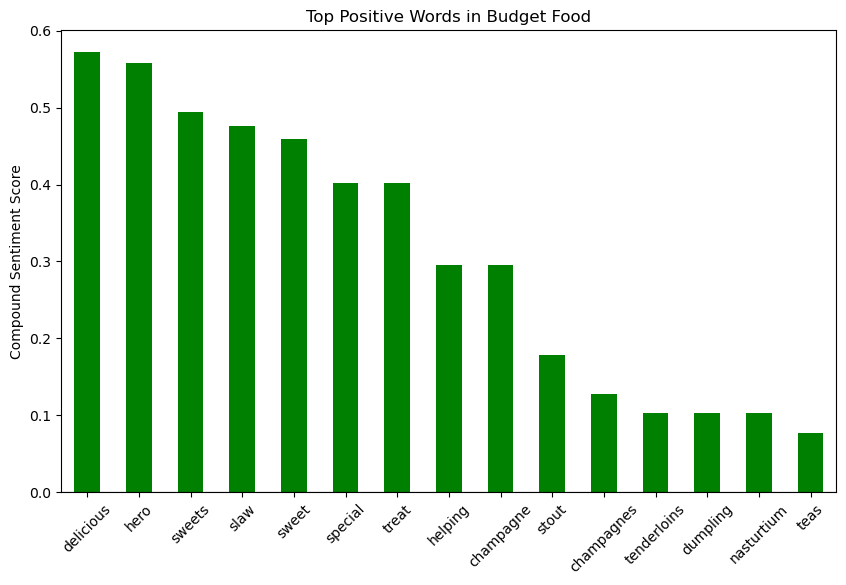

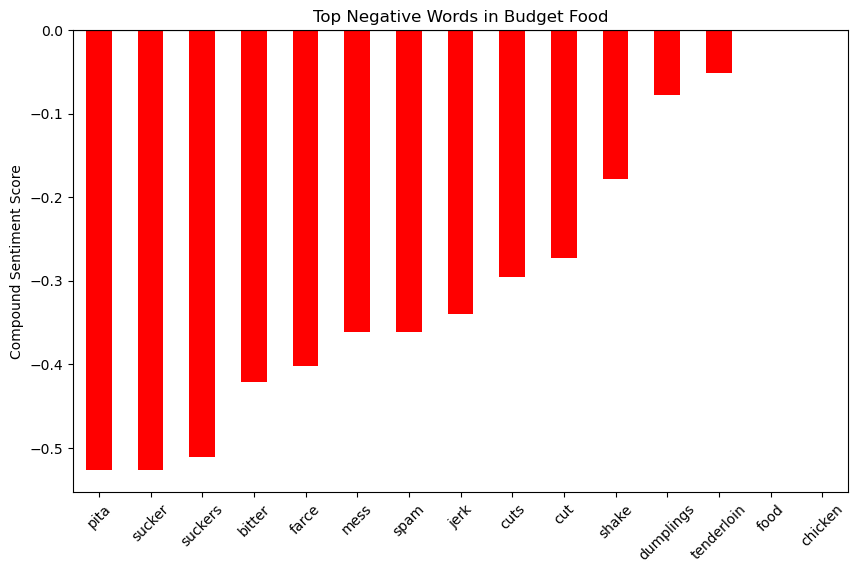

In [62]:
# Create a function to plot bar charts
def plot_sentiment_barchart(dataframe, title):
    plt.figure(figsize=(10, 6))
    dataframe['compound'].plot(kind='bar', color=['green' if x >= 0 else 'red' for x in dataframe['compound']])
    plt.title(title)
    plt.ylabel('Compound Sentiment Score')
    plt.xticks(rotation=45)
    plt.axhline(0, color='black', linewidth=0.8)
    plt.show()

# Plotting charts for finedining
plot_sentiment_barchart(top_finedining_positive, "Top Positive Words in Fine Dining")
plot_sentiment_barchart(top_finedining_negative, "Top Negative Words in Fine Dining")

# Plotting charts for budgetfood
plot_sentiment_barchart(top_budgetfood_positive, "Top Positive Words in Budget Food")
plot_sentiment_barchart(top_budgetfood_negative, "Top Negative Words in Budget Food")

In [165]:
#(Remove common words that exist in both datasets?)

# Modeling
---

In [65]:
# Create X and y variables
X = df['clean_text']
y = df['subreddit']

In [66]:
# Train_Test_Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
# Logistic Regression Pipeline with TfidfVectorizer
lr_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', LogisticRegression())
])

lr_pipeline.fit(X_train, y_train)
lr_predictions = lr_pipeline.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)

In [68]:
# Random Forest Pipeline with TfidfVectorizer
rf_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', RandomForestClassifier())
])

rf_pipeline.fit(X_train, y_train)
rf_predictions = rf_pipeline.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

In [69]:
# Print out accuracy scores for each model
print(f"Logistic Regression Accuracy: {lr_accuracy}")
print(f"Random Forest Accuracy: {rf_accuracy}")

Logistic Regression Accuracy: 0.9045092838196287
Random Forest Accuracy: 0.8885941644562334


In [70]:
# Baseline accuracy
y_test.value_counts(normalize=True)

subreddit
finedining    0.535809
budgetfood    0.464191
Name: proportion, dtype: float64

In [71]:
# Baseline accuracy is the highest value above.

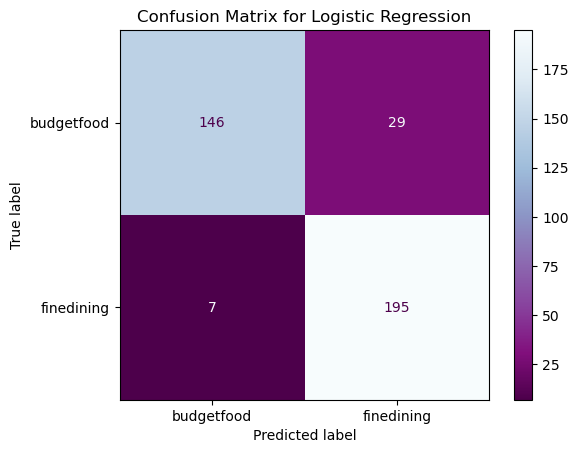

In [72]:
# Create the confusion matrix
cm_lr = confusion_matrix(y_test, lr_predictions)

# Create a ConfusionMatrixDisplay object
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=lr_pipeline.classes_)

# Plot the confusion matrix
cm_display.plot(cmap=plt.cm.BuPu_r)
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [73]:
# Extract values from the confusion matrix for Logistic Regression
tn, fp, fn, tp = cm_lr.ravel()

print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

True Negatives: 146
False Positives: 29
False Negatives: 7
True Positives: 195


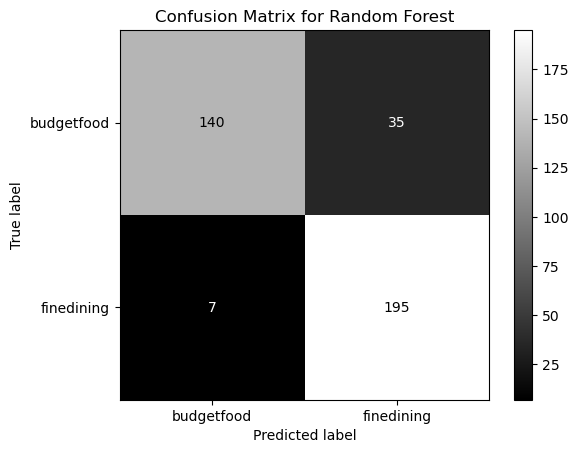

In [74]:
# Create the confusion matrix
cm_rf = confusion_matrix(y_test, rf_predictions)

# Create and plot the confusion matrix plot
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_pipeline.classes_)
cm_display.plot(cmap=plt.cm.gist_gray)
plt.title('Confusion Matrix for Random Forest')
plt.show()

In [75]:
# Extract values from the confusion matrix for Random Forest
tn, fp, fn, tp = cm_rf.ravel()

print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

True Negatives: 140
False Positives: 35
False Negatives: 7
True Positives: 195


In [76]:
#Compare Model Scores

In [77]:
def calculate_metrics(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    
    print(f"{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print()

# Calculate metrics for Logistic Regression
calculate_metrics(y_test, lr_predictions, "Logistic Regression")

# Calculate metrics for Random Forest
calculate_metrics(y_test, rf_predictions, "Random Forest")

Logistic Regression Metrics:
Accuracy: 0.9045
Precision: 0.9094
Recall: 0.9045
F1 Score: 0.9038

Random Forest Metrics:
Accuracy: 0.8886
Precision: 0.8964
Recall: 0.8886
F1 Score: 0.8874



In [167]:
# Pull out values of miscategorized posts to see why they were miscategorized